# Project: Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dataset provides me with details about patients who didn't show up at their appointments 
>Therefore, I will track the patients' records to find out why they didn't attend
>
>Q1:
>First of all, I would like to know the percentage of patients who attended and those who did not 

>Q2:Is there a relationship between the variables

>Q3:Then I will compare the variables I have with the attendance percentage like (Age, Scholarship, and Handicap)


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [38]:
# Upload the data and read the first row
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [39]:
#You need to know the data type and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [40]:
#If there are duplicates 
df.duplicated().sum()

0

In [41]:
# The statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Note**: According to what I found, the minimum age is -1, which is illogical.
The data types of ScheduledDay and AppointmentDay must be datetime, and some variable names need to be corrected

### Data Cleaning 

In [42]:
# Filtering any age is less than zero
df=df[df['Age']>=0]

In [43]:
# Convert datatypes to datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [44]:
# The AppointmentDay column does not have a time, so we calculate the difference between days
df['Waiting_Time']=df.AppointmentDay.dt.date - df.ScheduledDay.dt.date

In [45]:
# Difference between dates is negative, which is invalid
df=df[df['Waiting_Time'].dt.days >=0]

In [46]:
# In the data, I don't think the level of handicap matters
df.loc[df.Handcap > 1, "Handcap"] = 1

In [47]:
df['Handcap'].value_counts()

0    108282
1      2239
Name: Handcap, dtype: int64

In [48]:
df.rename(columns={'Handcap':'Handicap','Hipertension': 'Hypertension'},inplace=True)

In [49]:
# I think the address does not affect the data
df.drop(['Neighbourhood'],axis=1,inplace=True)

In [50]:
# By converting data from strings to 0,1 it can help with machine learning algorithms
cleanup_show={'No':1 , 'Yes':0}
cleanup_gender={'F':0 , 'M':1}

In [51]:
df['No-show'] = df['No-show'].replace(cleanup_show)
df['Gender'] = df['Gender'].replace(cleanup_gender)

In [52]:
#for check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  float64            
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  int64              
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Scholarship     110521 non-null  int64              
 7   Hypertension    110521 non-null  int64              
 8   Diabetes        110521 non-null  int64              
 9   Alcoholism      110521 non-null  int64              
 10  Handicap        110521 non-null  int64              
 11  SMS_received    110521 non-null  int64              
 12  No-show         110521 non-null  int64              
 13  Waiting_Time  

In [53]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_Time
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,1.474906e+14,5.675304e+06,0.350024,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,0.798102,10 days 04:25:27.412889858
std,2.560860e+14,7.129691e+04,0.476979,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,0.401419,15 days 06:07:25.262183605
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00
50%,3.173185e+13,5.680573e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4 days 00:00:00
75%,9.438963e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00


<a id='eda'></a>
## Exploratory Data Analysis


### What Is The Total Number of Patient Who Attend

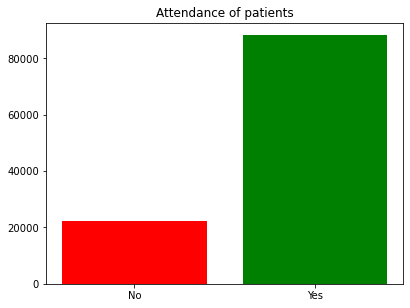

In [54]:
no=df[df['No-show']==0]["No-show"].count()
yes=df[df['No-show']==1]["No-show"].count()
plt.bar(["No", "Yes"], [no, yes],color=['red','green'])
plt.title("Attendance of patients")
plt.show()

### Is there a relationship between the variables

<AxesSubplot:>

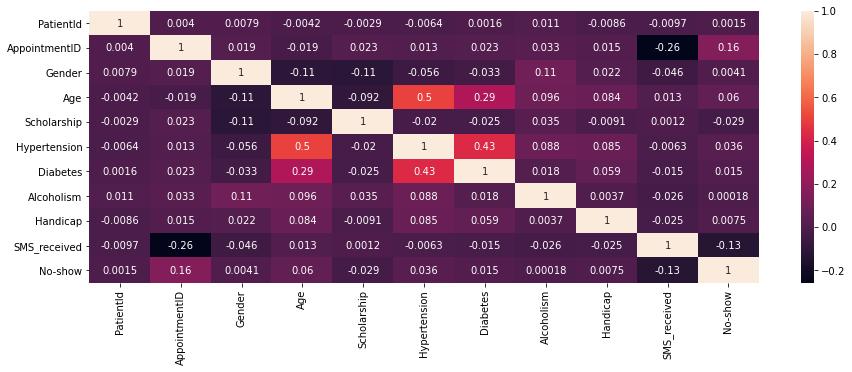

In [55]:
plt.rcParams["figure.figsize"] = (15,5)
sns.heatmap(df.corr(),annot=True)


### What is percentage of Who Attended and Receive a Message

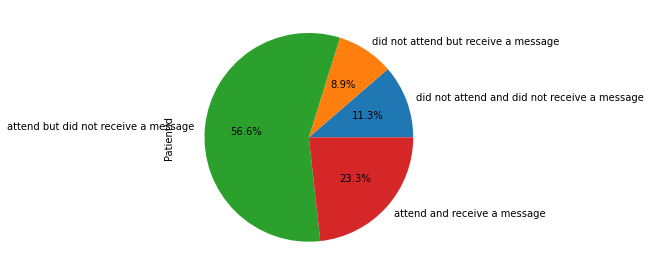

In [57]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)
label=['did not attend and did not receive a message','did not attend but receive a message','attend but did not receive a message','attend and receive a message']
df.groupby(['No-show','SMS_received']).PatientId.count().plot(kind= 'pie',autopct='%1.1f%%',labels=label);

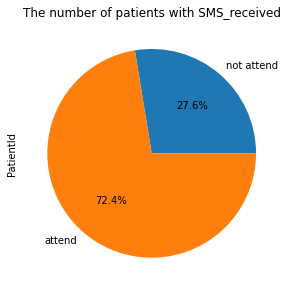

In [58]:
def pie_chart_attendance(df,colmn_name,attendance_column_name):
    label=['not attend','attend']
    df[df[colmn_name]==1].groupby([attendance_column_name]).PatientId.count().plot(kind= 'pie',autopct='%1.1f%%',labels=label);
    plt.title("The number of patients with "+colmn_name)
    plt.show()
pie_chart_attendance(df,'SMS_received','No-show')    

> **Note**:Patients ignore messages, so hospital needs to find another way to connect with them

### What effect does scholarship have on attendance?

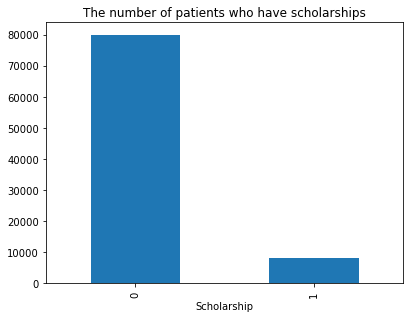

In [59]:
df[df['No-show']== 1].groupby(['Scholarship']).PatientId.count().plot(kind='bar')
plt.title('The number of patients who have scholarships')
plt.show()

> **Answer**: Here you can find the total number of patients who attended and if they have scholarships or not
             , I think scholarships Don't have a major impact on attendance

### I'm wondering if patients cannot attend because of their handicap.

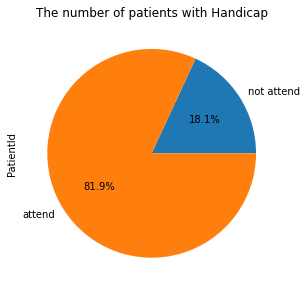

In [60]:
pie_chart_attendance(df,'Handicap','No-show')    

> **Answer**: I think Handicap have impact on attendance, The hospital may be able to help them in another way

### Is waiting time related to attendance?

In [61]:
df['Waiting_Time']=df.Waiting_Time.dt.days

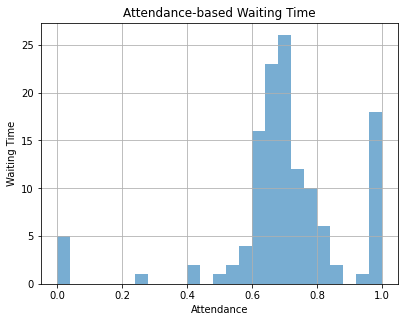

In [62]:
df.groupby('Waiting_Time')['No-show'].mean().hist(alpha=0.6,bins=25,label='show');
plt.title('Attendance-based Waiting Time')
plt.xlabel('Attendance')
plt.ylabel('Waiting Time')
plt.show()

> **Answer**: There is little wait time for the patients who attended

### In what age range did patients attend and not attend

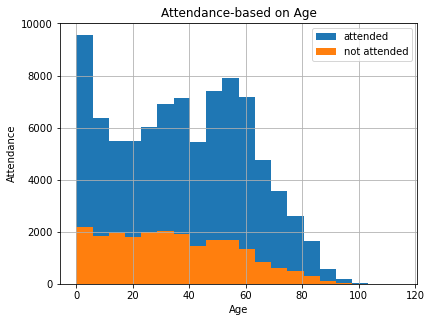

In [64]:
df.Age[df['No-show']==1].hist(label='attended',bins=20)
df.Age[df['No-show']==0].hist(label='not attended',bins=20);
plt.title('Attendance-based on Age')
plt.xlabel('Age')
plt.ylabel('Attendance')
plt.legend();

> **Answer**: Most people between the ages of 0-20 and 40-60 didn't attend 

<a id='conclusions'></a>
## Conclusions

>In my opinion the hospital must find another way to reminder patient with their appointment other than sending them SMS messages.
>
>If it possible the hospital may help patients who have handicap.
>
>Also I think the hospital shoul provide more than one appointment to make the patients have alternatives such that the waiting time is reduced to minimum.

>**Limitations**
>
>Appointment Date column must have a time to determine the waiting time in a meaningful way
>
>It would be helpful if the data contained the patient's address or the distance between his/her home and hospital 
>
>it was unfortunate that there was no correlation between attendance and other variables